In [4]:
import yasa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle
import mne
import seaborn as sns

import sys

sys.path.append('../utils/')
from update_sub_lists import *
from ERP_utils import *

In [6]:
#loading subjects and channel names

good_listen_subjects, good_motor_subjects, musicians, nonmusicians = load_subject_lists()
ch_names_64, ch_names_72 = load_channels()

In [128]:
subjects_to_process = good_listen_subjects

In [138]:
pre_list = []
post_list = []

for subject in subjects_to_process:
    # Load pre and post data
    data_pre = loadmat(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/data_preprocessed/{subject}/eeg_listen_pre_{subject}.mat')
    eeg_pre = data_pre['trial_data']
    data_post = loadmat(f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/data_preprocessed/{subject}/eeg_listen_post_{subject}.mat')
    eeg_post = data_post['trial_data']

    # Calculate band power for pre and post data
    bp_pre = yasa.bandpower(eeg_pre, sf=128, ch_names=ch_names_64)
    bp_post = yasa.bandpower(eeg_post, sf=128, ch_names=ch_names_64)

    # Create DataFrames for pre and post data
    means_pre = pd.DataFrame(bp_pre.mean()).transpose()
    means_post = pd.DataFrame(bp_post.mean()).transpose()
    
    # Add musician status
    means_pre['subject'] = subject
    means_post['subject'] = subject
    means_pre['musician'] = 1 if subject in musicians else 0
    means_post['musician'] = 1 if subject in musicians else 0
    means_pre['period'] = 'pre'
    means_post['period'] = 'post'


    # Append to lists
    pre_list.append(means_pre)
    post_list.append(means_post)

# Concatenate all DataFrames into pre_all and post_all
pre_all = pd.concat(pre_list, ignore_index=True)
post_all = pd.concat(post_list, ignore_index=True)


In [140]:
power_df

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative,subject,musician,period
0,0.598316,0.215975,0.136130,0.046761,0.002812,0.000006,2.850158e-11,0.25,1.0,01,0,pre
1,0.484526,0.279818,0.200866,0.029923,0.004860,0.000007,5.307112e-11,0.25,1.0,02,1,pre
2,0.470701,0.171357,0.310736,0.042229,0.004968,0.000009,4.812887e-11,0.25,1.0,03,0,pre
3,0.657489,0.153239,0.150030,0.036152,0.003083,0.000006,5.008761e-11,0.25,1.0,04,0,pre
4,0.607913,0.142533,0.215485,0.029482,0.004578,0.000009,9.090506e-11,0.25,1.0,05,0,pre
5,0.492064,0.192319,0.253965,0.051045,0.010600,0.000007,4.395742e-11,0.25,1.0,06,1,pre
6,0.633393,0.161633,0.174332,0.028576,0.002062,0.000004,7.323565e-11,0.25,1.0,07,1,pre
7,0.420801,0.276530,0.238864,0.052772,0.011015,0.000018,3.146056e-11,0.25,1.0,08,0,pre
8,0.540573,0.183809,0.241996,0.029117,0.004497,0.000009,3.024358e-11,0.25,1.0,09,0,pre
9,0.669199,0.169814,0.126286,0.032015,0.002681,0.000006,3.983147e-11,0.25,1.0,10,0,pre


In [136]:
power_df.columns[0:7]

Index(['Delta', 'Theta', 'Alpha', 'Sigma', 'Beta', 'Gamma', 'TotalAbsPow'], dtype='object')

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_89589/36673705.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(power_df, x='musician', y=band, hue='period',
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_89589/36673705.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(power_df, x='musician', y=band, hue='period',
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_89589/36673705.py:7: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(power_df, x='musician', y=band, hue='period',
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_89589/36673705.py:7: FutureWarning: 

Setting a gradient pa

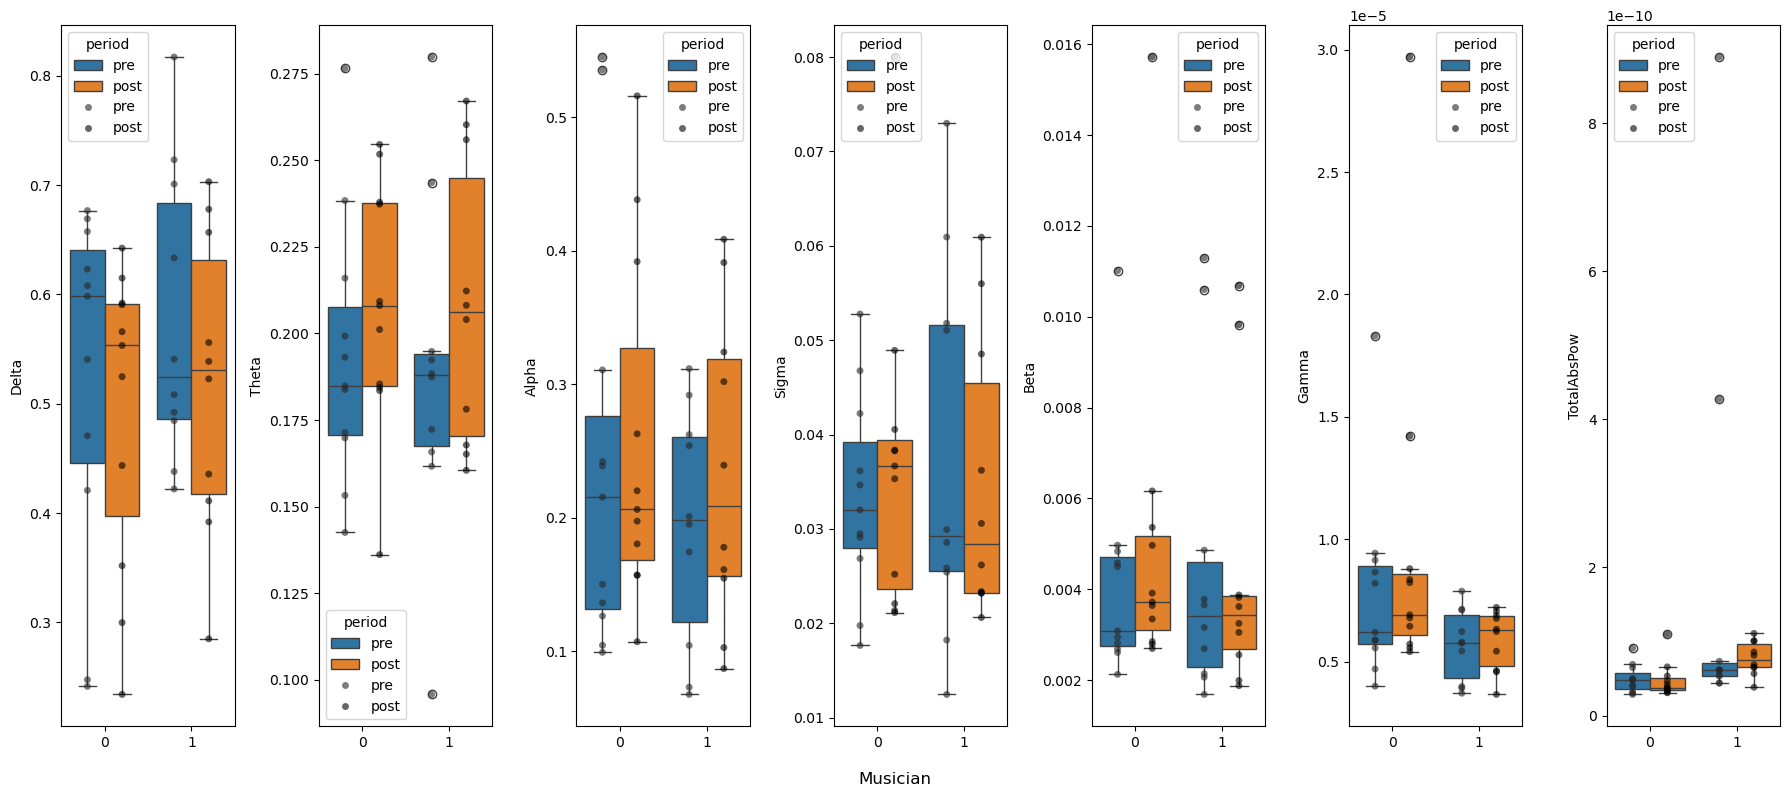

In [146]:

bands = power_df.columns[0:7]

fig, axes = plt.subplots(nrows=1, ncols=len(bands), figsize=(18, 8), sharey=False)

for i, band in enumerate(bands):
    sns.boxplot(power_df, x='musician', y=band, hue='period', ax=axes[i])
    sns.stripplot(power_df, x='musician', y=band, hue='period',
                  color='black', jitter=False, dodge=True, alpha=0.6, ax=axes[i])
    axes[i].set_ylabel(band)
    axes[i].set_xlabel('')

fig.supxlabel('Musician')

plt.tight_layout()
plt.show()

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_89589/474376602.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=power_df, x='musician', y=band, hue='period',
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_89589/474376602.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=power_df, x='musician', y=band, hue='period',
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_89589/474376602.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=power_df, x='musician', y=band, hue='period',
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_89589/474376602.py:15: FutureWarning: 

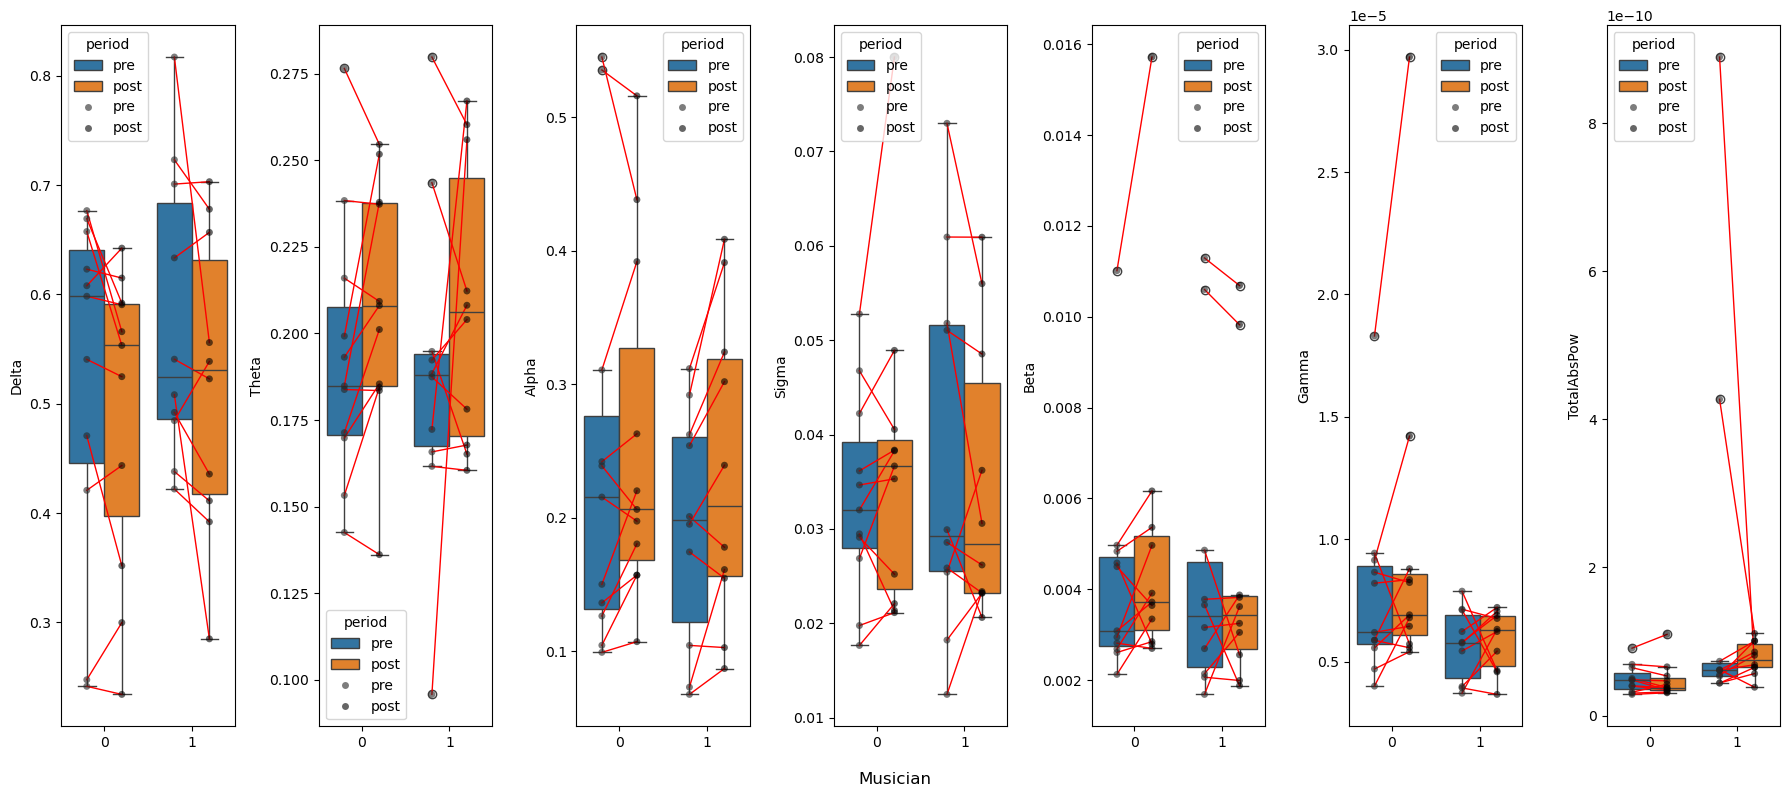

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'power_df' is your DataFrame and it's already defined
bands = power_df.columns[0:7]

fig, axes = plt.subplots(nrows=1, ncols=len(bands), figsize=(18, 8), sharey=False)

for i, band in enumerate(bands):
    # Create the boxplot
    sns.boxplot(data=power_df, x='musician', y=band, hue='period', ax=axes[i])
    
    # Create the stripplot
    sns.stripplot(data=power_df, x='musician', y=band, hue='period',
                  color='black', jitter=False, dodge=True, alpha=0.6, ax=axes[i])
    
    # Connect pre and post points for each subject
    subjects = power_df['subject'].unique()
    for subject in subjects:
        subject_data = power_df[power_df['subject'] == subject]
        if len(subject_data) == 2:  # Ensure there are both pre and post points
            pre_point = subject_data[subject_data['period'] == 'pre']
            post_point = subject_data[subject_data['period'] == 'post']
            if not pre_point.empty and not post_point.empty:
                # Get the y values for the pre and post points
                y_pre = pre_point[band].values[0]
                y_post = post_point[band].values[0]
                x_musician = pre_point['musician'].values[0]  # Assuming 'musician' is the same for both
                
                # Plot line connecting pre and post points
                if subject in musicians:
                    axes[i].plot([0.8,1.2], [y_pre, y_post], color='red', linestyle='-', linewidth=1)

                else:
                    axes[i].plot([-0.2,0.2], [y_pre, y_post], color='red', linestyle='-', linewidth=1)



    axes[i].set_ylabel(band)
    axes[i].set_xlabel('')

fig.supxlabel('Musician')

plt.tight_layout()
plt.show()
